<a href="https://colab.research.google.com/github/JeromeMberia/Autolib_electric_car_sharing_service_company/blob/main/Autolib_electric_car_sharing_service_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the dataset

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
df = pd.read_csv('autolib_daily_events_postal_code (3).csv', delimiter=",")

# Checking the dataset

In [268]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [269]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [270]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [271]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [272]:
rows = df.shape[0]
columns = df.shape[1]
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 16085 rows and 13 columns


In [273]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [274]:
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [275]:
df.duplicated().sum()

0

In [276]:
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [277]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# Tidying the Dataset

In [278]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [279]:
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [280]:
# Renaming columns
df = df.rename(columns={"dayofweek": "day_of_week", 
                        "bluecars_taken_sum": "blue_cars_taken_sum", 
                        "bluecars_returned_sum": "blue_cars_returned_sum"})

In [281]:
# drop colums
try:
  df = df.drop(['n_daily_data_points','utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'], axis=1)
except:
  print('Droped !')
print('*********************************')
print(df.columns)

*********************************
Index(['postal_code', 'date', 'day_of_week', 'day_type', 'blue_cars_taken_sum',
       'blue_cars_returned_sum'],
      dtype='object')


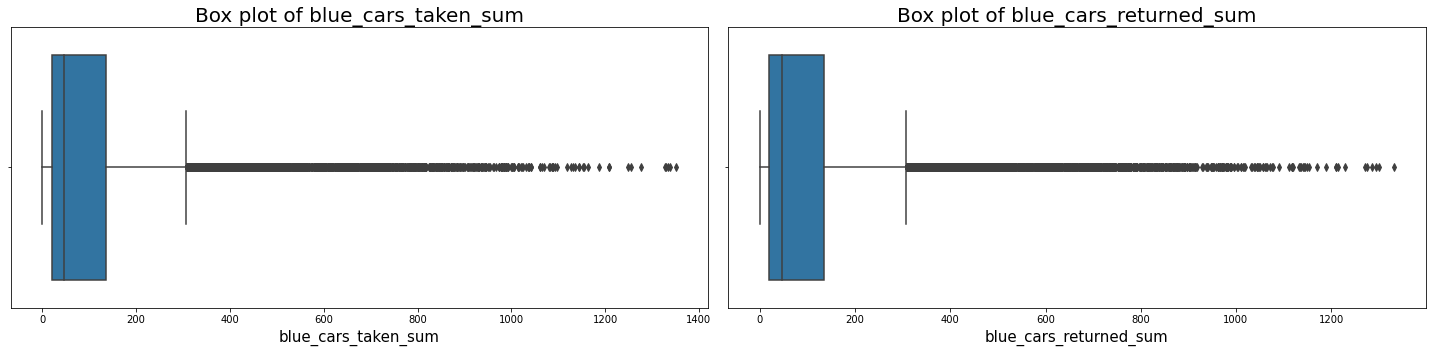

In [282]:
# Checking for Outliers
col = df.drop(['postal_code', 'date', 'day_of_week', 'day_type'], axis=1)

names = list(col.columns)
fig, axes = plt.subplots(1, 2 , figsize=(20,5))  

i = 0
for name in names:

  sns.boxplot(x=df[name], ax=axes[i])
  axes[i].set_title(f'Box plot of {name}', fontsize=20)
  axes[i].set_xlabel(name, fontsize=15)
  i+=1

plt.tight_layout()
plt.show()


In [283]:
# Checking for Anomalies
  
blue_cars_returned_sum_Q1 = df['blue_cars_returned_sum'].quantile(.25)
blue_cars_returned_sum_Q3 = df['blue_cars_returned_sum'].quantile(.75)

iqr_bc_r_s = blue_cars_returned_sum_Q3 - blue_cars_returned_sum_Q1


blue_cars_taken_sum_Q1 = df['blue_cars_taken_sum'].quantile(.25)
blue_cars_taken_sum_Q3 = df['blue_cars_taken_sum'].quantile(.75)

iqr_bc_t_s = blue_cars_taken_sum_Q3 - blue_cars_taken_sum_Q1

print(f'The interquartile range of blue_cars_returned_sum is {iqr_bc_r_s}.')
print(f'The interquartile range of blue_cars_taken_sum is {iqr_bc_t_s}.')

The interquartile range of blue_cars_returned_sum is 115.0.
The interquartile range of blue_cars_taken_sum is 115.0.


In [284]:
# Identifying the Missing Data
df.isnull().sum()

postal_code               0
date                      0
day_of_week               0
day_type                  0
blue_cars_taken_sum       0
blue_cars_returned_sum    0
dtype: int64

In [285]:
# Identifying the Duplicate Data
df.duplicated().sum()

0

In [286]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

In [287]:
df.dtypes

postal_code                        int64
date                      datetime64[ns]
day_of_week                        int64
day_type                          object
blue_cars_taken_sum                int64
blue_cars_returned_sum             int64
dtype: object

In [288]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [289]:
df.year.unique()

array([2018])

In [290]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [291]:
df.dtypes

postal_code                        int64
date                      datetime64[ns]
day_of_week                        int64
day_type                          object
blue_cars_taken_sum                int64
blue_cars_returned_sum             int64
year                               int64
month                              int64
dtype: object

In [292]:
df['month'] = df['month'].astype(int)

In [293]:
df['year'] = df['year'].astype(int)

In [294]:
df['month'].replace({1:'January',
                    2:'February', 
                    3:'March',
                    4:'April', 
                    5:'May', 
                    6:'June', 
                    7:'July', 
                    8:'August', 
                    9:'September', 
                    10:'October', 
                    11:'November', 
                    12:'December'},inplace=True)

In [295]:
df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

# Exploratory Analysis

## Univariate Analysis

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

### Central Tendency

#### mean

In [ ]:
df_p_c = df.groupby('postal_code')

In [ ]:
df_p_c['blue_cars_taken_sum'].mean()

In [ ]:
df_p_['blue_cars_returned_sum'].mean()

#### median

#### mode

In [ ]:
df['household_size'].mode()

### Dispersion

#### Standard Deviation

#### Variance

#### Range

#### Quantiles

#### Summary statistics

### Descriptions of the distribution curve

#### Skewness

#### Kurtosis

### Bivariate Analysis

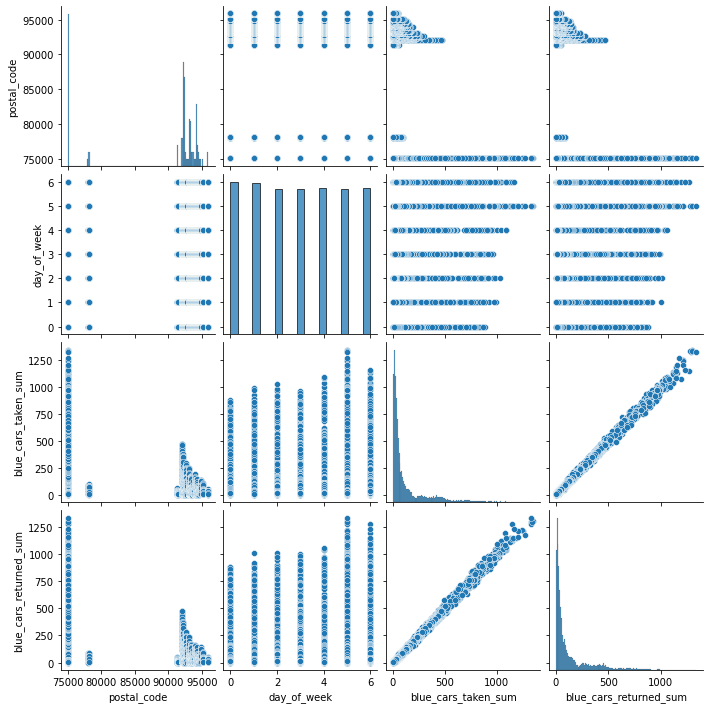

In [299]:
df_1 = df.drop(['year'], axis=1)
sns.pairplot(df_1)
plt.show()

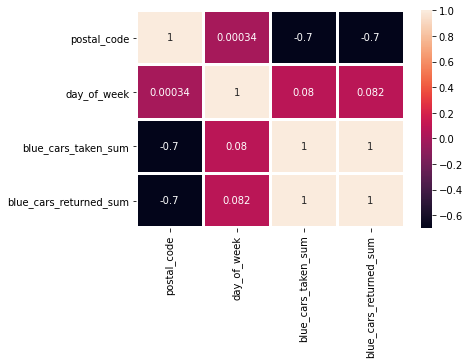

In [300]:
sns.heatmap(df_1.corr(),annot=True, linecolor='white', linewidths=2, )
plt.show()

# Hypothesis Test

In [ ]:
sample_a = df[df['postal_code']=]
sample_b

## Specify the Null Hypothesis

## Specify the Alternative Hypothesis

## Set the Significance Level

## Calculate the Test Statistic 

## Corresponding P-Value

## Drawing a Conclusion